In [1]:
import pandas as pd
import numpy as np

In [136]:
titanic = pd.read_csv('datasets/titanic/train.csv')

In [137]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
## target class: survived!

In [9]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [87]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Let's try imputing vals to missing vals

In [138]:
## there are missing vals in age, cabin, embarked
missing_val_count_by_column = (titanic.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])
### there are a few things that we can try in order to get rid of missing vals:
# impute a val
# drop col - if cols have a lot of missing vals
# drop row - if rows have a lot of missing vals (not recommended for test set in competition)

Age         177
Cabin       687
Embarked      2
dtype: int64


In [14]:
titanic['Cabin'].value_counts()
## what is cabin? does it matter?
# cabin number. Probably irrelevant if this is captures by fare and/or pclass
# test this with a label encoder

G6             4
B96 B98        4
C23 C25 C27    4
C22 C26        3
E101           3
              ..
E31            1
A7             1
C101           1
B78            1
B80            1
Name: Cabin, Length: 147, dtype: int64

In [15]:
titanic['Embarked'].value_counts()
# port of embarkment: C -Cherbourg, Q -Queenstown, S - Southampton

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [139]:
titanic[titanic['Embarked'].isnull()]
# the idea would be to impute here based on similarity to other rows based
# on cabin, fare?

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [142]:
titanic[titanic['Ticket'] == '113572']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,S
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,S


In [141]:
# Impute most common Embarked val: S
titanic.at[61, 'Embarked'] = 'S'
titanic.at[829, 'Embarked'] = 'S'

In [30]:
# let's labelencode cabin
from sklearn.preprocessing import LabelEncoder

In [93]:
le = LabelEncoder()

In [143]:
le.fit(titanic['Cabin'].astype(str))

LabelEncoder()

In [95]:
list(le.classes_)

['A10',
 'A14',
 'A16',
 'A19',
 'A20',
 'A23',
 'A24',
 'A26',
 'A31',
 'A32',
 'A34',
 'A36',
 'A5',
 'A6',
 'A7',
 'B101',
 'B102',
 'B18',
 'B19',
 'B20',
 'B22',
 'B28',
 'B3',
 'B30',
 'B35',
 'B37',
 'B38',
 'B39',
 'B4',
 'B41',
 'B42',
 'B49',
 'B5',
 'B50',
 'B51 B53 B55',
 'B57 B59 B63 B66',
 'B58 B60',
 'B69',
 'B71',
 'B73',
 'B77',
 'B78',
 'B79',
 'B80',
 'B82 B84',
 'B86',
 'B94',
 'B96 B98',
 'C101',
 'C103',
 'C104',
 'C106',
 'C110',
 'C111',
 'C118',
 'C123',
 'C124',
 'C125',
 'C126',
 'C128',
 'C148',
 'C2',
 'C22 C26',
 'C23 C25 C27',
 'C30',
 'C32',
 'C45',
 'C46',
 'C47',
 'C49',
 'C50',
 'C52',
 'C54',
 'C62 C64',
 'C65',
 'C68',
 'C7',
 'C70',
 'C78',
 'C82',
 'C83',
 'C85',
 'C86',
 'C87',
 'C90',
 'C91',
 'C92',
 'C93',
 'C95',
 'C99',
 'D',
 'D10 D12',
 'D11',
 'D15',
 'D17',
 'D19',
 'D20',
 'D21',
 'D26',
 'D28',
 'D30',
 'D33',
 'D35',
 'D36',
 'D37',
 'D45',
 'D46',
 'D47',
 'D48',
 'D49',
 'D50',
 'D56',
 'D6',
 'D7',
 'D9',
 'E10',
 'E101',
 'E12',
 

In [144]:
titanic['Cabin_encoded'] = le.transform(titanic['Cabin'].astype(str))

In [145]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_encoded
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,147
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,81
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,147
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,55
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,147


In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

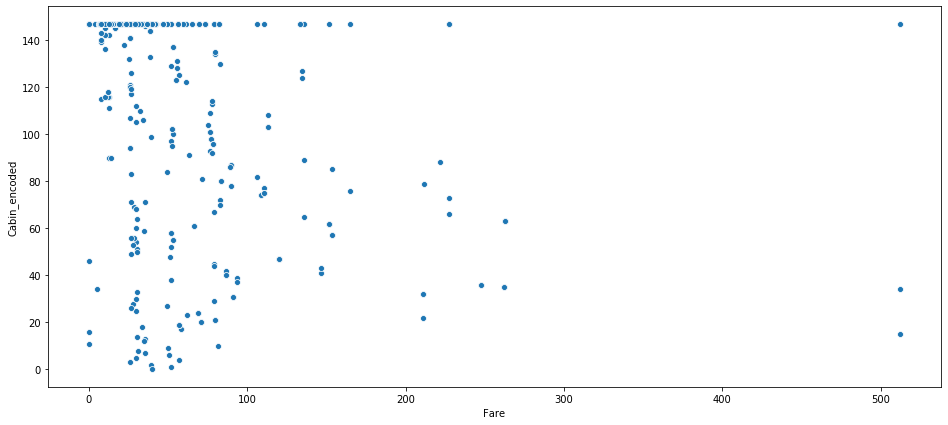

In [40]:
plt.figure(figsize=(16, 7))
sns.scatterplot(x='Fare', y='Cabin_encoded', data=titanic)
plt.show()
### y = 147: NaN

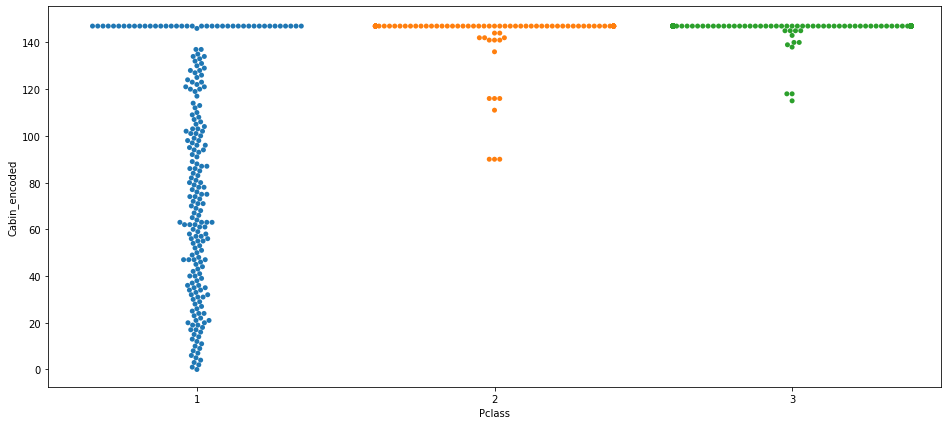

In [41]:
plt.figure(figsize=(16, 7))
sns.swarmplot(x='Pclass', y='Cabin_encoded', data=titanic)
plt.show()

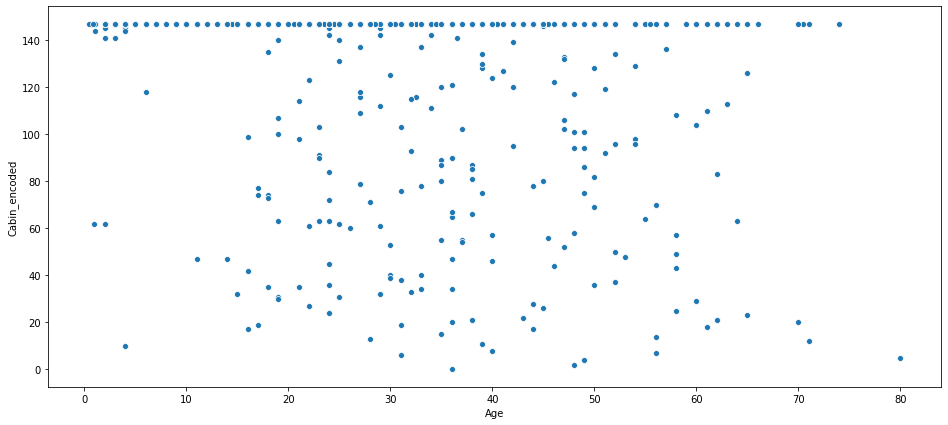

In [42]:
plt.figure(figsize=(16, 7))
sns.scatterplot(x='Age', y='Cabin_encoded', data=titanic)
plt.show()

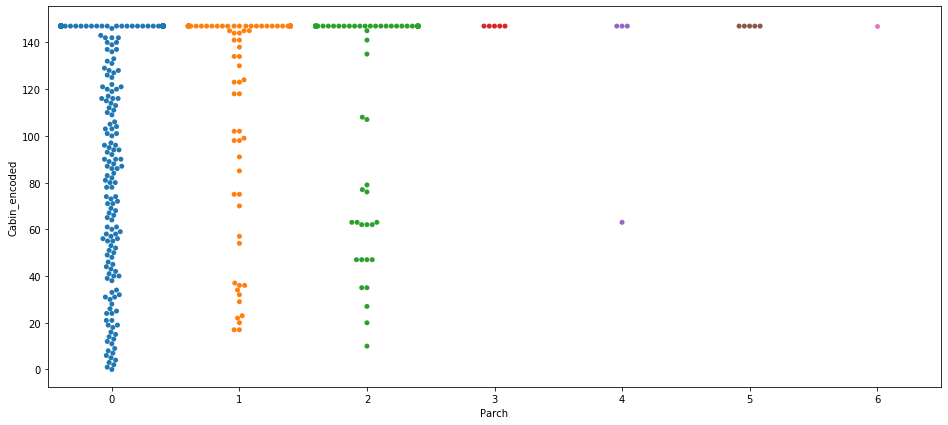

In [44]:
plt.figure(figsize=(16, 7))
sns.swarmplot(x='Parch', y='Cabin_encoded', data=titanic)
plt.show()

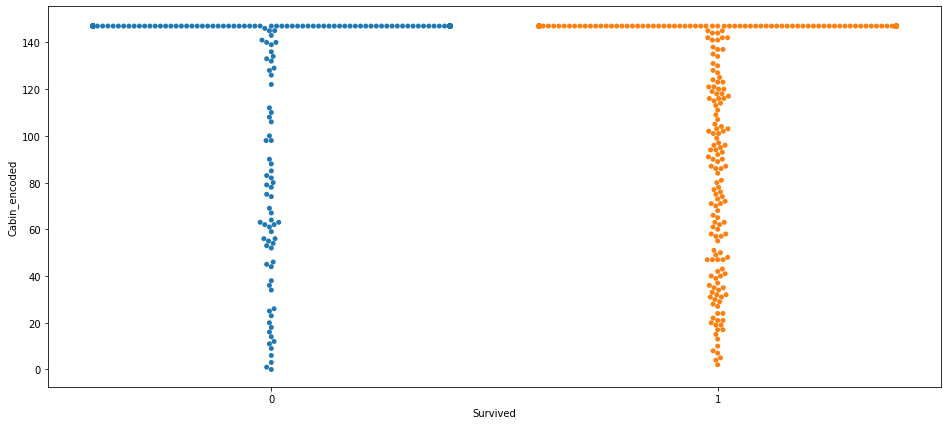

In [45]:
plt.figure(figsize=(16, 7))
sns.swarmplot(x='Survived', y='Cabin_encoded', data=titanic)
plt.show()

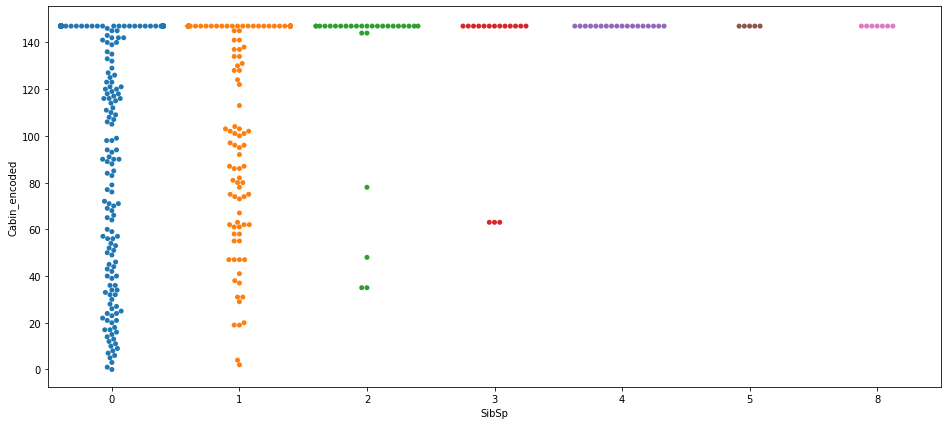

In [46]:
plt.figure(figsize=(16, 7))
sns.swarmplot(x='SibSp', y='Cabin_encoded', data=titanic)
plt.show()

In [146]:
missing_val_count_by_column = (titanic.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

Age      177
Cabin    687
dtype: int64


In [49]:
## let's impute vals to age
## let's do the simplest method: the median!
from sklearn.impute import SimpleImputer

In [147]:
imputer = SimpleImputer(strategy='median')

In [148]:
imputer.fit(titanic['Age'].values.reshape(-1, 1))

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

##### *To do: try a better imputer: custom made or catboost

In [149]:
titanic['Age'] = imputer.transform(titanic['Age'].values.reshape(-1, 1))

In [150]:
missing_val_count_by_column = (titanic.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

Cabin    687
dtype: int64


In [105]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_encoded
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,147
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,81
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,147
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,55
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,147


### More viz

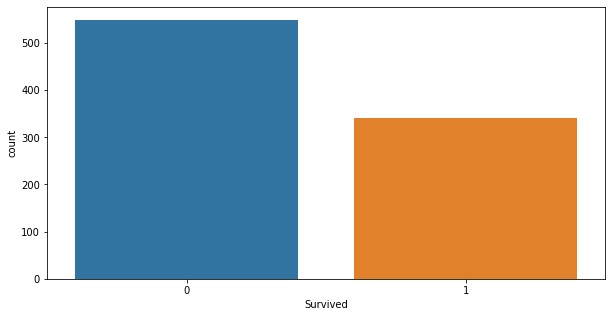

In [81]:
"""
    SURVIVED
"""
plt.figure(figsize=(10, 5))
sns.countplot(x='Survived', data=titanic)
plt.show()

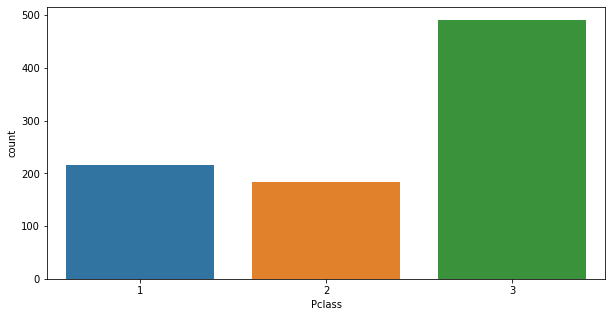

In [80]:
"""
    PCLASS
"""
plt.figure(figsize=(10, 5))
sns.countplot(x='Pclass', data=titanic)
plt.show()

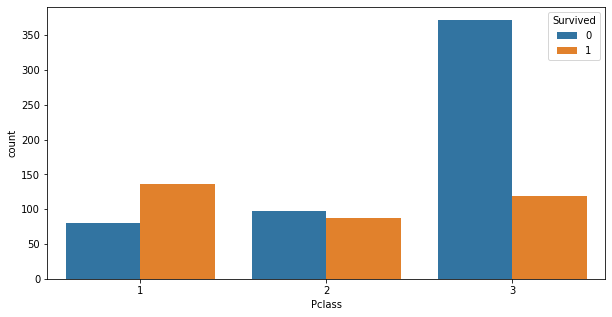

In [83]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Pclass', hue='Survived', data=titanic)
plt.show()

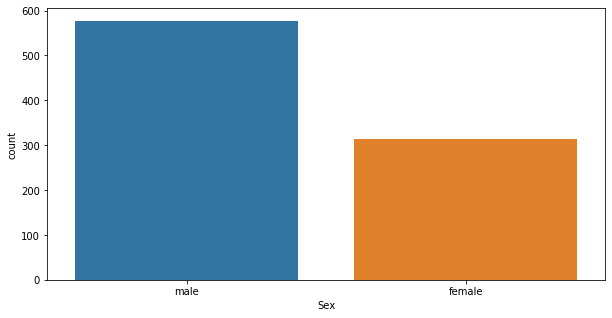

In [106]:
"""
    SEX
"""
plt.figure(figsize=(10, 5))
sns.countplot(x='Sex', data=titanic)
plt.show()
### more men than women!

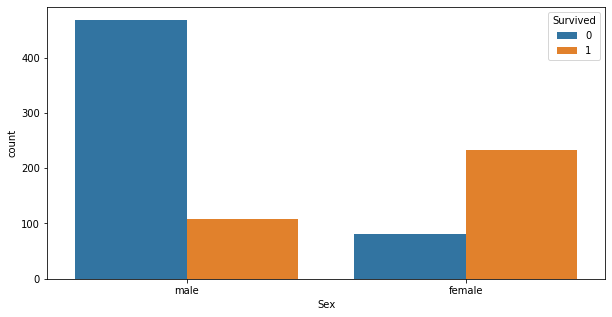

In [107]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Sex', hue='Survived', data=titanic)
plt.show()
## more women survived tho!

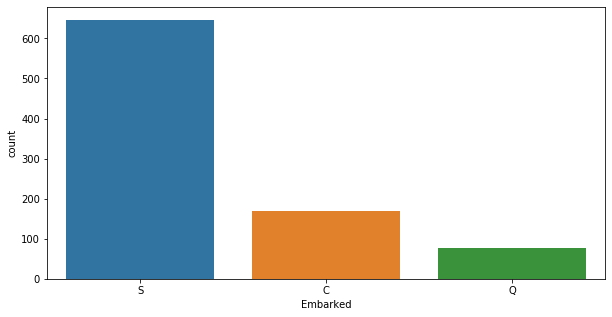

In [108]:
"""
    EMBARKED
"""
plt.figure(figsize=(10, 5))
sns.countplot(x='Embarked', data=titanic)
plt.show()
### most people boarded on southampton

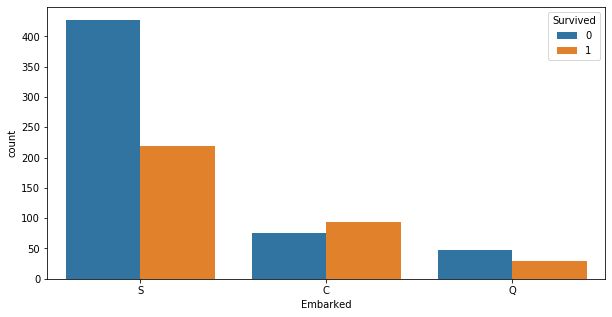

In [109]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Embarked', hue='Survived', data=titanic)
plt.show()

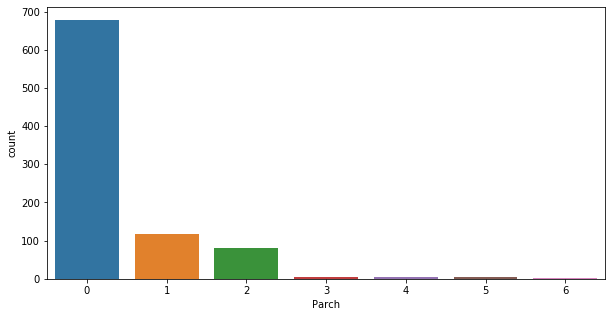

In [110]:
"""
    PARCH
"""
plt.figure(figsize=(10, 5))
sns.countplot(x='Parch', data=titanic)
plt.show()
### most people traveled without parents or children

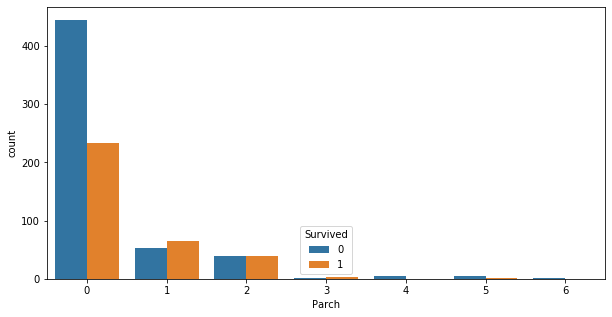

In [112]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Parch', hue='Survived', data=titanic)
plt.show()

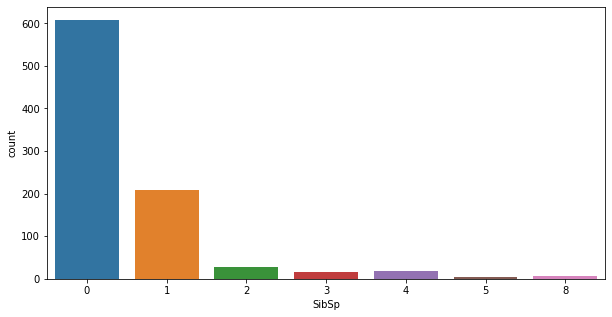

In [114]:
"""
    SIBSP
"""
plt.figure(figsize=(10, 5))
sns.countplot(x='SibSp', data=titanic)
plt.show()
## most people traveled without siblings or spouse

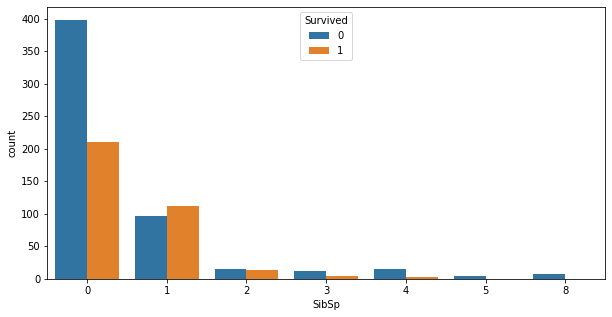

In [115]:
plt.figure(figsize=(10, 5))
sns.countplot(x='SibSp', hue='Survived', data=titanic)
plt.show()

<Figure size 720x360 with 0 Axes>

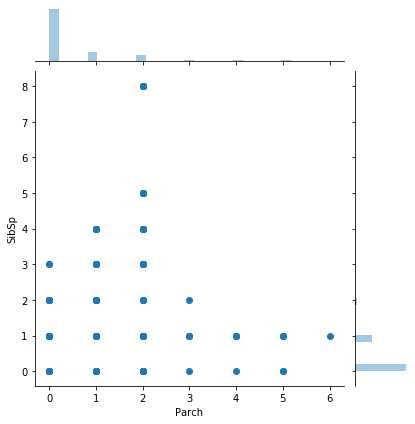

In [117]:
plt.figure(figsize=(10, 5))
sns.jointplot(x="Parch", y="SibSp", data=titanic);
plt.show()

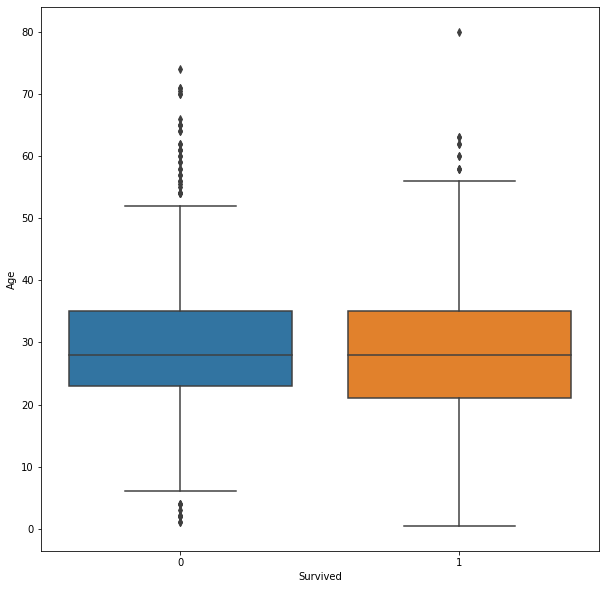

In [120]:
"""
    AGE
"""
plt.figure(figsize=(10, 10))
sns.boxplot(x='Survived', y='Age', data=titanic)
plt.show()
## almost safe to say that if you were a child you would've survived

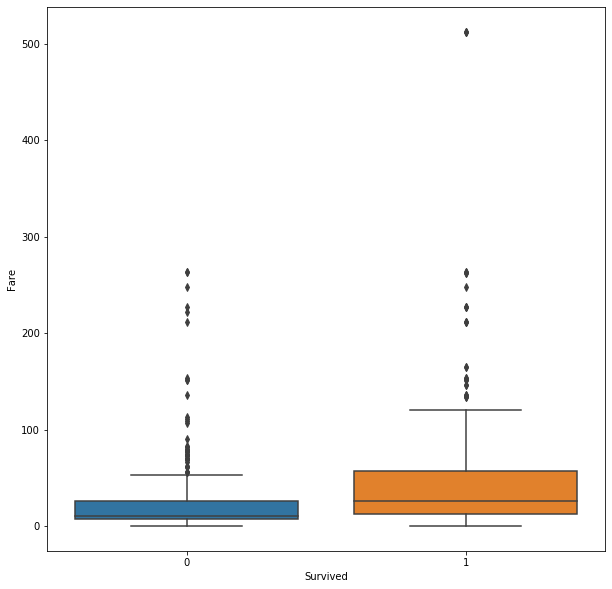

In [121]:
"""
    FARE
"""
plt.figure(figsize=(10, 10))
sns.boxplot(x='Survived', y='Fare', data=titanic)
plt.show()
### mean are different. Do a t-test for significance? Cant be done! Data isnt gaussian-like
### people who paid larger fares were more likely to survive

### Here we have finished visualizing and we're ready to drop cols

In [151]:
missing_val_count_by_column = (titanic.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

Cabin    687
dtype: int64


In [152]:
#### cabin isn't too informative
## let's drop it too
unnecessary_cols = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'Cabin_encoded']

In [153]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_encoded
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,147
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,81
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,147
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,55
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,147


#### Let's drop "unnecessary" cols

In [154]:
#### cabin isn't too informative
## let's drop it too
unnecessary_cols = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'Cabin_encoded']
titanic.drop(unnecessary_cols, inplace=True, axis=1)

In [155]:
titanic = pd.get_dummies(titanic)
### why pclass isnt created dummies? cos it's not categorical :P

In [156]:
titanic.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


### Scaling num vars

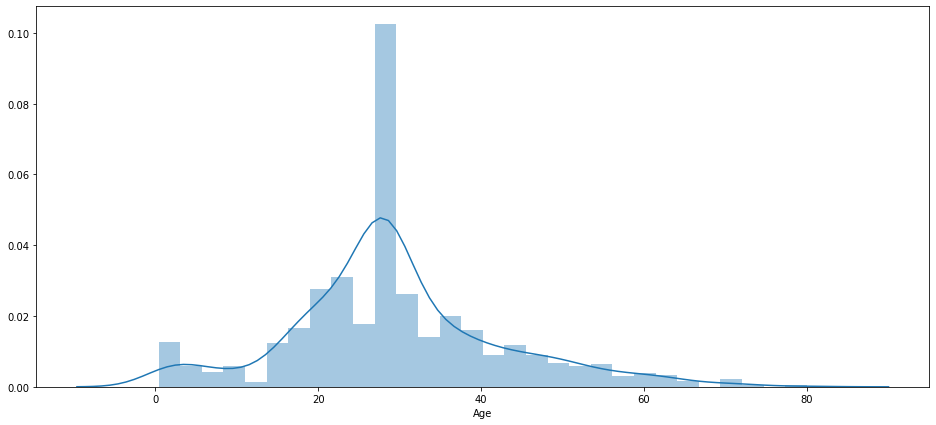

In [71]:
### how is age distributed?
plt.figure(figsize=(16, 7))
sns.distplot(titanic['Age'])
plt.show()

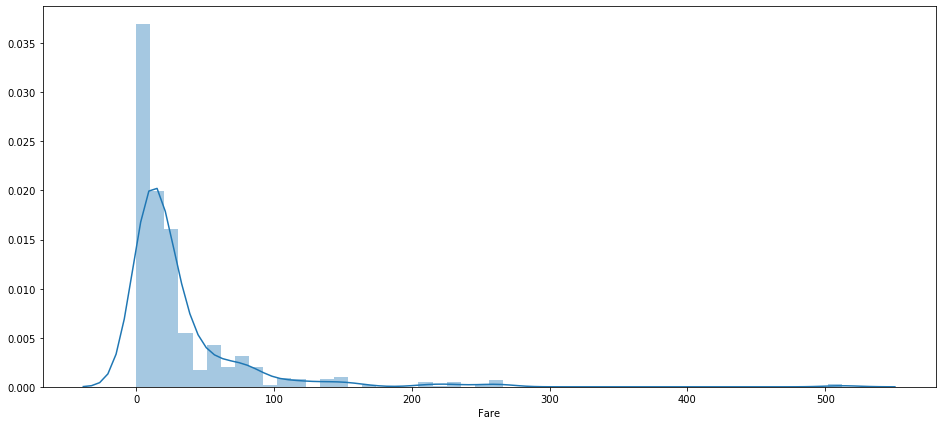

In [72]:
### what about fare?
plt.figure(figsize=(16, 7))
sns.distplot(titanic['Fare'])
plt.show()
#### right skewed

In [122]:
from sklearn.preprocessing import StandardScaler

In [129]:
ageSC = StandardScaler()

In [157]:
ageSC.fit(titanic['Age'].values.reshape(-1, 1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [158]:
titanic['Age'] = ageSC.transform(titanic['Age'].values.reshape(-1, 1))

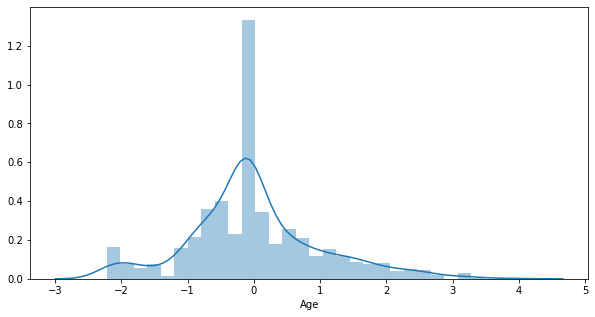

In [159]:
plt.figure(figsize=(10, 5))
sns.distplot(titanic['Age'])
plt.show()

### Age has lots of outliers. Perhaps another scaling strategy would be better?

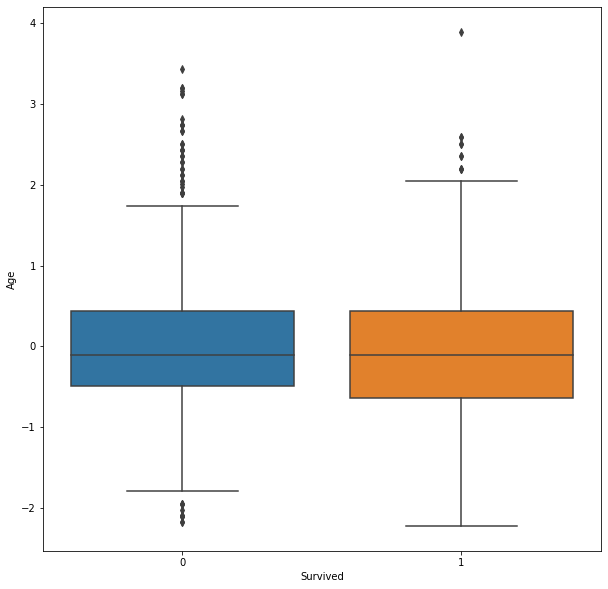

In [178]:
"""
    AGE
"""
plt.figure(figsize=(10, 10))
sns.boxplot(x='Survived', y='Age', data=titanic)
plt.show()

#### Fare is right-skewed. Let's use something to make it more Gaussian-like!

In [135]:
from sklearn.preprocessing import PowerTransformer

In [167]:
titanic[titanic['Fare'] == 0]
### some people traveled for free?? then, no Box-Cox transform can be applied :-(

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
179,0,3,0.510161,0,0,0.0,0,1,0,0,1
263,0,1,0.817561,0,0,0.0,0,1,0,0,1
271,1,3,-0.335187,0,0,0.0,0,1,0,0,1
277,0,2,-0.104637,0,0,0.0,0,1,0,0,1
302,0,3,-0.796286,0,0,0.0,0,1,0,0,1
413,0,2,-0.104637,0,0,0.0,0,1,0,0,1
466,0,2,-0.104637,0,0,0.0,0,1,0,0,1
481,0,2,-0.104637,0,0,0.0,0,1,0,0,1
597,0,3,1.509209,0,0,0.0,0,1,0,0,1
633,0,1,-0.104637,0,0,0.0,0,1,0,0,1


In [168]:
ptFare = PowerTransformer()

In [169]:
ptFare.fit(titanic['Fare'].values.reshape(-1, 1))

PowerTransformer(copy=True, method='yeo-johnson', standardize=True)

In [170]:
titanic['Fare'] = ptFare.transform(titanic['Fare'].values.reshape(-1, 1))

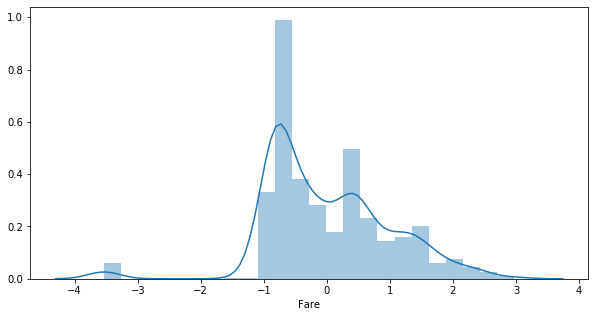

In [171]:
plt.figure(figsize=(10, 5))
sns.distplot(titanic['Fare'])
plt.show()
"""
is it more gaussian-like?? how does it compare vs target var?
"""

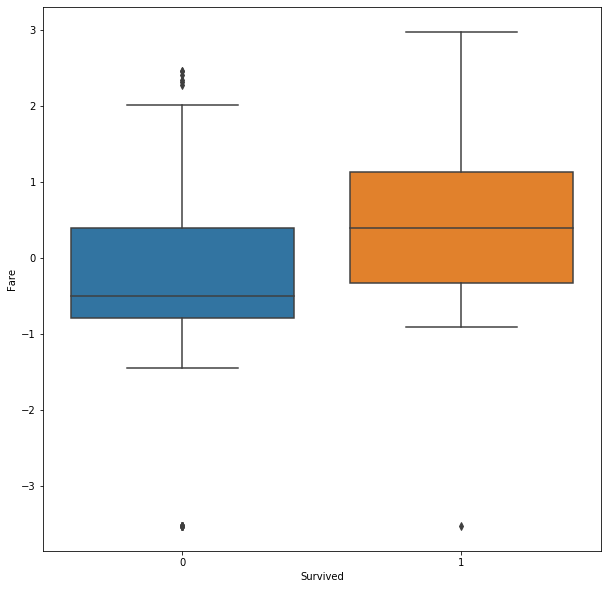

In [172]:
"""
    FARE
"""
plt.figure(figsize=(10, 10))
sns.boxplot(x='Survived', y='Fare', data=titanic)
plt.show()
"""
t-test now?
now it's more evident that both distros differ
there're less outliers
it's clearer that people that paid more had more
chances of survival
"""

In [173]:
titanic.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,-0.565736,1,0,-0.878820,0,1,0,0,1
1,1,1,0.663861,1,0,1.336651,1,0,1,0,0
2,1,3,-0.258337,0,0,-0.790065,1,0,0,0,1
3,1,1,0.433312,1,0,1.067352,1,0,0,0,1
4,0,3,0.433312,0,0,-0.774439,0,1,0,0,1


## Are we ready to model?

In [181]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report

In [174]:
X = titanic.drop(['Survived'], axis=1, inplace=False)
y = titanic['Survived']

#### A small detour to do cross validation

In [192]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score

In [194]:
kFold = StratifiedKFold(n_splits=10, random_state=0, shuffle=True)
accs = []
f1s = []
for i, (train_idx, test_idx) in enumerate(kFold.split(X, y)):
    print("Fold:", i)
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    modelLR = LogisticRegression(random_state=0)
    modelLR.fit(X_train, y_train)
    preds = modelLR.predict(X_test)
    acc = accuracy_score(y_test, preds)
    f1 = f1_score(y_test, preds)
    print("Acc:", acc, "F1-score:", f1)
    accs.append(acc)
    f1s.append(f1)
    print()
print("Mean acc:", np.mean(accs))
print("Mean f1 score:", np.mean(f1s))

Fold: 0
Acc: 0.8222222222222222 F1-score: 0.7777777777777778

Fold: 1
Acc: 0.797752808988764 F1-score: 0.71875

Fold: 2
Acc: 0.8089887640449438 F1-score: 0.7605633802816901

Fold: 3
Acc: 0.8539325842696629 F1-score: 0.8059701492537314

Fold: 4
Acc: 0.7752808988764045 F1-score: 0.7142857142857144

Fold: 5
Acc: 0.7865168539325843 F1-score: 0.7164179104477613

Fold: 6
Acc: 0.7191011235955056 F1-score: 0.6268656716417911

Fold: 7
Acc: 0.8089887640449438 F1-score: 0.7301587301587301

Fold: 8
Acc: 0.7415730337078652 F1-score: 0.6349206349206349

Fold: 9
Acc: 0.7752808988764045 F1-score: 0.7142857142857143

Mean acc: 0.7889637952559301
Mean f1 score: 0.7199995683053545


In [177]:
from sklearn.model_selection import train_test_split

In [195]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Stuff to try:
### ROC curves
### Grid search
### XGBoost, NNs
### feature importance

### First impressions with classification. We will have a look to feature importance too

In [196]:
modelLR = LogisticRegression(random_state=0)
modelLR.fit(X_train, y_train)
preds = modelLR.predict(X_test)
print(classification_report(y_test, preds))
print(confusion_matrix(y_test, preds))

              precision    recall  f1-score   support

           0       0.84      0.85      0.85       168
           1       0.74      0.73      0.74       100

    accuracy                           0.81       268
   macro avg       0.79      0.79      0.79       268
weighted avg       0.81      0.81      0.81       268

[[143  25]
 [ 27  73]]


In [185]:
feature_importance = pd.DataFrame({'Feature': X.columns.tolist(), 'Coefficients': modelLR.coef_[0]})

In [186]:
feature_importance

,Feature,Coefficients
0,Pclass,-0.846205
1,Age,-0.513805
2,SibSp,-0.458837
3,Parch,-0.161179
4,Fare,0.319810
5,Sex_female,1.322664
6,Sex_male,-1.321789
7,Embarked_C,0.106373
8,Embarked_Q,0.154843
9,Embarked_S,-0.260341


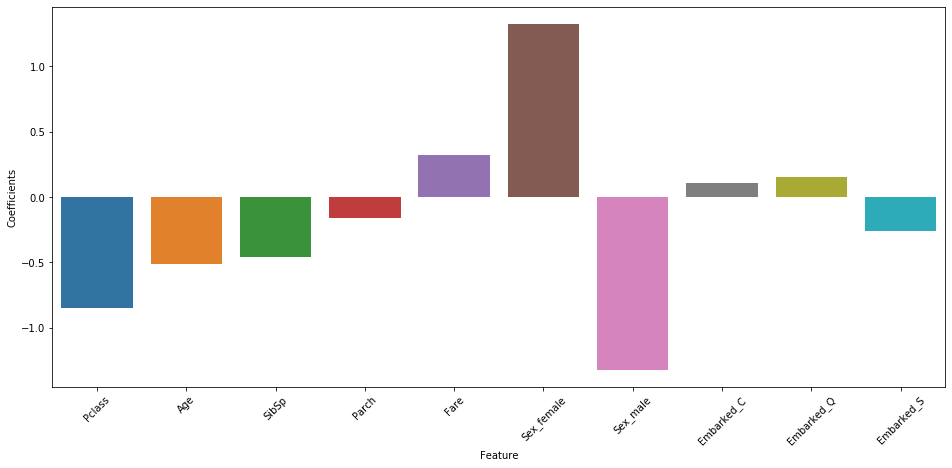

In [187]:
plt.figure(figsize=(16, 7))
sns.barplot(x='Feature', y='Coefficients', data=feature_importance)
plt.xticks(rotation=45)
plt.show()

### Let's have a look at ROC curve

In [197]:
from sklearn.metrics import roc_curve, auc

In [248]:
probs = modelLR.predict_proba(X_test)
probs = probs[:, 1]

In [249]:
fprLR, tprLR, thresholdLR = roc_curve(y_test, probs, pos_label=1)

In [250]:
print("AUC:", auc(fprLR, tprLR))

AUC: 0.8570833333333334


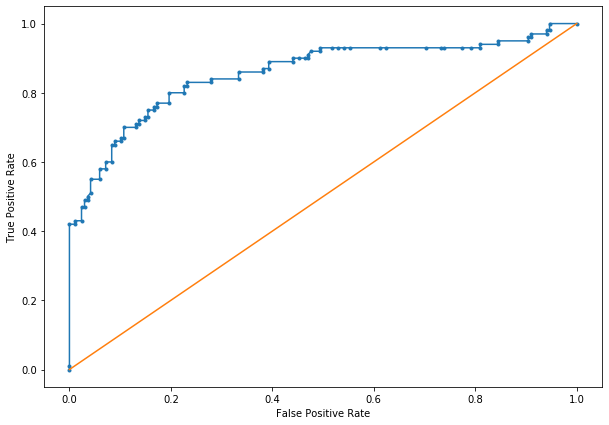

In [251]:
plt.figure(figsize=(10, 7))
plt.plot(fprLR, tprLR, marker='.')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0, 1], [0, 1])
# show the plot
plt.show()

In [252]:
i = np.arange(len(tprLR))
roc = pd.DataFrame({'tf': pd.Series(tprLR-(1-fprLR), index=i), 'threshold': pd.Series(thresholdLR, index=i)})
roc_t = roc.iloc[(roc.tf-0).abs().argsort()[:1]]                 
print('Best thresh:', list(roc_t['threshold']))

Best thresh: [0.329988328719691]


In [230]:
#def preds_by_thresh(prob_vec, thresh):
#thresh = 0.329988328719691
thresh = 0.329988328719691
preds = []
for proba in probs:
    if proba >= thresh:
        preds.append(1)
    else:
        preds.append(0)

In [231]:
accuracy_score(y_test, preds)
# 0.8022388059701493 -- thresh obtained from ROC analysis
# 0.8059701492537313 -- thresh = 0.5

0.8022388059701493

In [232]:
f1_score(y_test, preds)
# 0.7511737089201878 -- comments as above!
# 0.7373737373737373 

0.7511737089201878

In [233]:
confusion_matrix(y_test, preds)

array([[135,  33],
       [ 20,  80]])

In [228]:
"""
    The thresh above was estimated using X_test and y_test (i.e. VALIDATION SET)
    How do we know that the same thresh will result in the
    same acc and f1-score when applied in REAL test set???
    there is only one way: TRY IT!
"""

'\n    The thresh above was estimated using X_test and y_test (i.e. VALIDATION SET)\n    How do we know that the same thresh will result in the\n    same acc and f1-score when applied in REAL test set???\n'

#### Let's try a simple decision tree

In [234]:
from sklearn.tree import DecisionTreeClassifier

In [243]:
modelDT = DecisionTreeClassifier(random_state=0, max_depth=5)
modelDT.fit(X_train, y_train)
preds = modelDT.predict(X_test)
print(classification_report(y_test, preds))
print(confusion_matrix(y_test, preds))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85       168
           1       0.76      0.73      0.74       100

    accuracy                           0.81       268
   macro avg       0.80      0.80      0.80       268
weighted avg       0.81      0.81      0.81       268

[[145  23]
 [ 27  73]]


In [244]:
feature_importance = pd.DataFrame({'Feature': X.columns.tolist(), 'Score': modelDT.feature_importances_})

In [245]:
feature_importance

,Feature,Score
0,Pclass,0.149411
1,Age,0.150570
2,SibSp,0.083803
3,Parch,0.014509
4,Fare,0.060775
5,Sex_female,0.000000
6,Sex_male,0.523459
7,Embarked_C,0.000000
8,Embarked_Q,0.000000
9,Embarked_S,0.017473


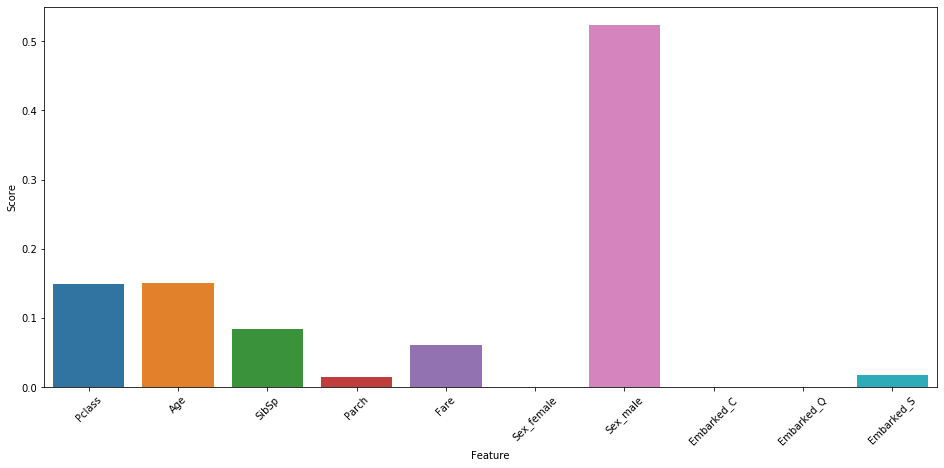

In [246]:
plt.figure(figsize=(16, 7))
sns.barplot(x='Feature', y='Score', data=feature_importance)
plt.xticks(rotation=45)
plt.show()

In [253]:
probs = modelDT.predict_proba(X_test)
probs = probs[:, 1]

In [254]:
fprDT, tprDT, thresholdDT = roc_curve(y_test, probs, pos_label=1)

In [255]:
print("AUC:", auc(fprDT, tprDT))

AUC: 0.8454464285714286


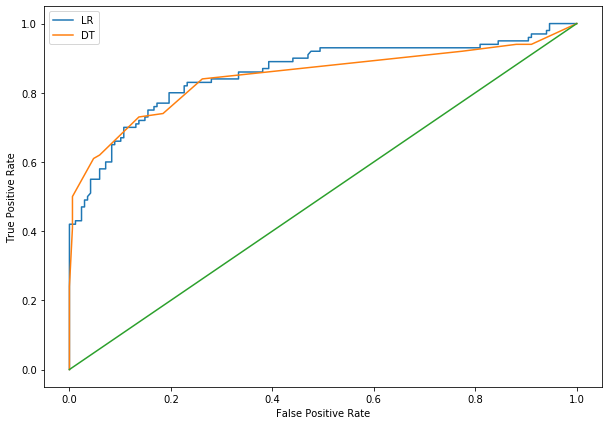

In [259]:
plt.figure(figsize=(10, 7))
plt.plot(fprLR, tprLR)
plt.plot(fprDT, tprDT)
plt.legend(['LR','DT'])
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0, 1], [0, 1])
# show the plot
plt.show()

In [260]:
i = np.arange(len(tprDT))
roc = pd.DataFrame({'tf': pd.Series(tprDT-(1-fprDT), index=i), 'threshold': pd.Series(thresholdDT, index=i)})
roc_t = roc.iloc[(roc.tf-0).abs().argsort()[:1]]
print('Best thresh:', list(roc_t['threshold']))

Best thresh: [0.5]


In [261]:
thresh = 0.5
preds = []
for proba in probs:
    if proba >= thresh:
        preds.append(1)
    else:
        preds.append(0)

In [262]:
print(accuracy_score(y_test, preds))
print(f1_score(y_test, preds))
print(confusion_matrix(y_test, preds))

0.7873134328358209
0.7219512195121951
[[137  31]
 [ 26  74]]


#### Let's try SVMs now

In [272]:
modelSVC = SVC(random_state=0, kernel='linear', probability=True)
modelSVC.fit(X_train, y_train)
preds = modelSVC.predict(X_test)
print(classification_report(y_test, preds))
print(confusion_matrix(y_test, preds))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83       168
           1       0.72      0.71      0.71       100

    accuracy                           0.79       268
   macro avg       0.77      0.77      0.77       268
weighted avg       0.79      0.79      0.79       268

[[140  28]
 [ 29  71]]


In [273]:
feature_importance = pd.DataFrame({'Feature': X.columns.tolist(), 'Coefficients': modelSVC.coef_[0]})

In [274]:
feature_importance

,Feature,Coefficients
0,Pclass,-0.000364
1,Age,-0.000392
2,SibSp,-0.000504
3,Parch,-0.000151
4,Fare,0.000239
5,Sex_female,1.000083
6,Sex_male,-1.000083
7,Embarked_C,0.000062
8,Embarked_Q,-0.000011
9,Embarked_S,-0.000052


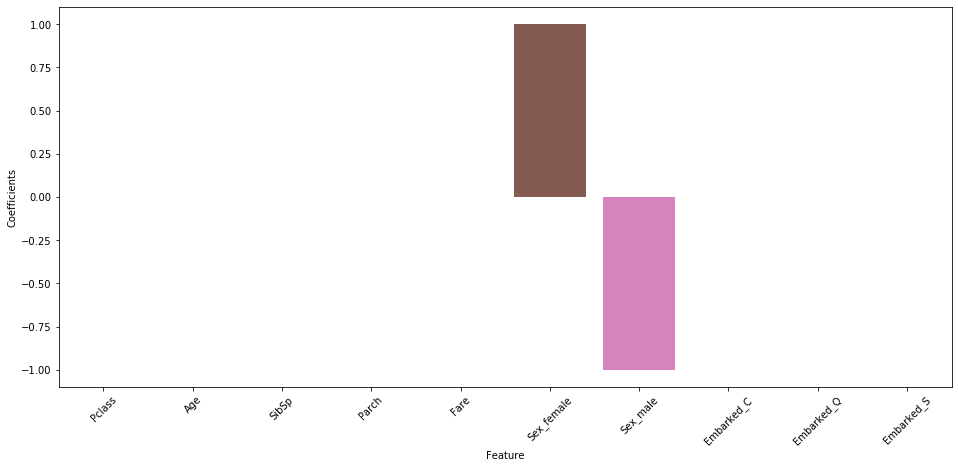

In [275]:
plt.figure(figsize=(16, 7))
sns.barplot(x='Feature', y='Coefficients', data=feature_importance)
plt.xticks(rotation=45)
plt.show()

In [276]:
probs = modelSVC.predict_proba(X_test)
probs = probs[:, 1]

In [277]:
fprSVC, tprSVC, thresholdSVC = roc_curve(y_test, probs, pos_label=1)

In [278]:
print("AUC:", auc(fprSVC, tprSVC))

AUC: 0.8477380952380953


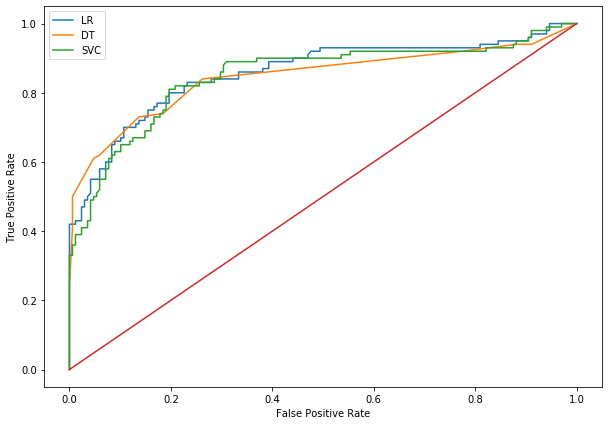

In [279]:
plt.figure(figsize=(10, 7))
plt.plot(fprLR, tprLR)
plt.plot(fprDT, tprDT)
plt.plot(fprSVC, tprSVC)
plt.legend(['LR','DT', 'SVC'])
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0, 1], [0, 1])
# show the plot
plt.show()

In [280]:
i = np.arange(len(tprSVC))
roc = pd.DataFrame({'tf': pd.Series(tprSVC-(1-fprSVC), index=i), 'threshold': pd.Series(thresholdSVC, index=i)})
roc_t = roc.iloc[(roc.tf-0).abs().argsort()[:1]]
print('Best thresh:', list(roc_t['threshold']))

Best thresh: [0.19744104517882796]


In [281]:
thresh = 0.19744104517882796
preds = []
for proba in probs:
    if proba >= thresh:
        preds.append(1)
    else:
        preds.append(0)

In [282]:
print(accuracy_score(y_test, preds))
print(f1_score(y_test, preds))
print(confusion_matrix(y_test, preds))

0.8059701492537313
0.7570093457943925
[[135  33]
 [ 19  81]]


### Not very good performance w estimators out of the box, possibly we'll need to try a different feature selection/scaling strategy

### In the meantime, let's continue playing around w different models

#### Random Forest

In [292]:
modelRF = RandomForestClassifier(random_state=0, max_depth=5, n_estimators=200)                                                                      
modelRF.fit(X_train, y_train)
preds = modelRF.predict(X_test)
print(classification_report(y_test, preds))
print(confusion_matrix(y_test, preds))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       168
           1       0.79      0.69      0.74       100

    accuracy                           0.82       268
   macro avg       0.81      0.79      0.80       268
weighted avg       0.82      0.82      0.81       268

[[150  18]
 [ 31  69]]


In [293]:
feature_importance = pd.DataFrame({'Feature': X.columns.tolist(), 'Score': modelRF.feature_importances_})

In [294]:
feature_importance

,Feature,Score
0,Pclass,0.124245
1,Age,0.100137
2,SibSp,0.049123
3,Parch,0.028726
4,Fare,0.133139
5,Sex_female,0.238237
6,Sex_male,0.286750
7,Embarked_C,0.015183
8,Embarked_Q,0.006664
9,Embarked_S,0.017795


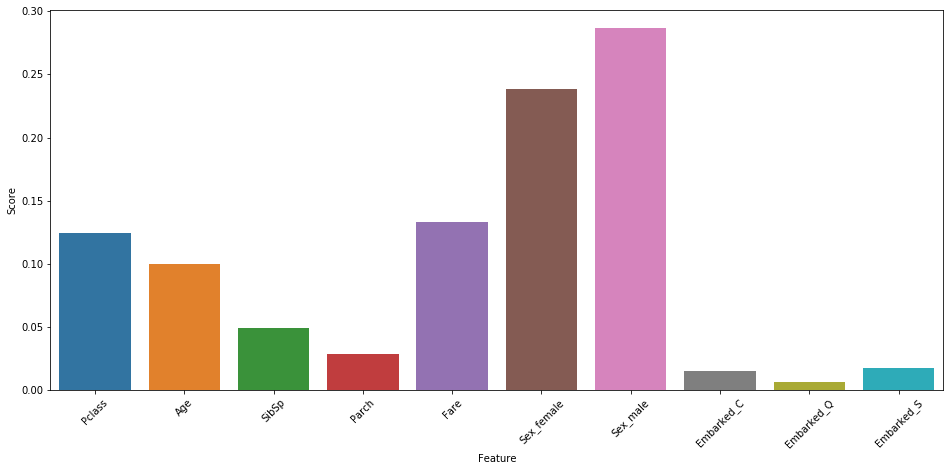

In [295]:
plt.figure(figsize=(16, 7))
sns.barplot(x='Feature', y='Score', data=feature_importance)
plt.xticks(rotation=45)
plt.show()

In [296]:
probs = modelRF.predict_proba(X_test)
probs = probs[:, 1]

In [297]:
fprRF, tprRF, thresholdRF = roc_curve(y_test, probs, pos_label=1)

In [298]:
print("AUC:", auc(fprRF, tprRF))

AUC: 0.8800892857142857


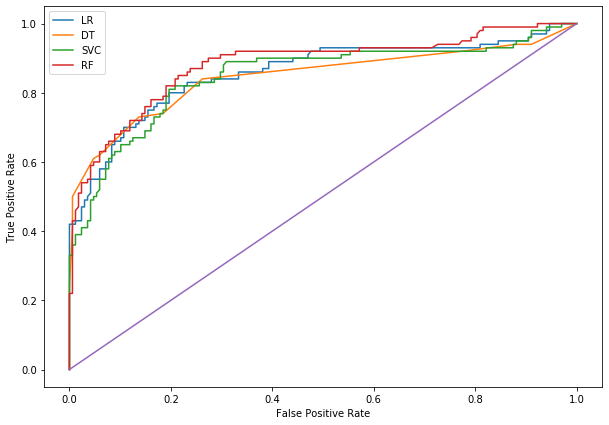

In [299]:
plt.figure(figsize=(10, 7))
plt.plot(fprLR, tprLR)
plt.plot(fprDT, tprDT)
plt.plot(fprSVC, tprSVC)
plt.plot(fprRF, tprRF)
plt.legend(['LR','DT','SVC','RF'])
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0, 1], [0, 1])
# show the plot
plt.show()

In [300]:
i = np.arange(len(tprRF))
roc = pd.DataFrame({'tf': pd.Series(tprRF-(1-fprRF), index=i), 'threshold': pd.Series(thresholdRF, index=i)})
roc_t = roc.iloc[(roc.tf-0).abs().argsort()[:1]]
print('Best thresh:', list(roc_t['threshold']))

Best thresh: [0.3254039087203783]


In [301]:
thresh = 0.3254039087203783
preds = []
for proba in probs:
    if proba >= thresh:
        preds.append(1)
    else:
        preds.append(0)

In [302]:
print(accuracy_score(y_test, preds))
print(f1_score(y_test, preds))
print(confusion_matrix(y_test, preds))

0.8134328358208955
0.7663551401869159
[[136  32]
 [ 18  82]]


### XGBoost

In [303]:
from xgboost import XGBClassifier

In [305]:
modelXGB = XGBClassifier(random_state=0, n_estimators=200)
modelXGB.fit(X_train, y_train)
preds = modelXGB.predict(X_test)
print(classification_report(y_test, preds))
print(confusion_matrix(y_test, preds))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87       168
           1       0.78      0.78      0.78       100

    accuracy                           0.84       268
   macro avg       0.82      0.82      0.82       268
weighted avg       0.84      0.84      0.84       268

[[146  22]
 [ 22  78]]


In [306]:
feature_importance = pd.DataFrame({'Feature': X.columns.tolist(), 'Score': modelXGB.feature_importances_})

In [307]:
feature_importance

,Feature,Score
0,Pclass,0.189324
1,Age,0.032412
2,SibSp,0.104859
3,Parch,0.028708
4,Fare,0.030703
5,Sex_female,0.469598
6,Sex_male,0.000000
7,Embarked_C,0.041936
8,Embarked_Q,0.018654
9,Embarked_S,0.083806


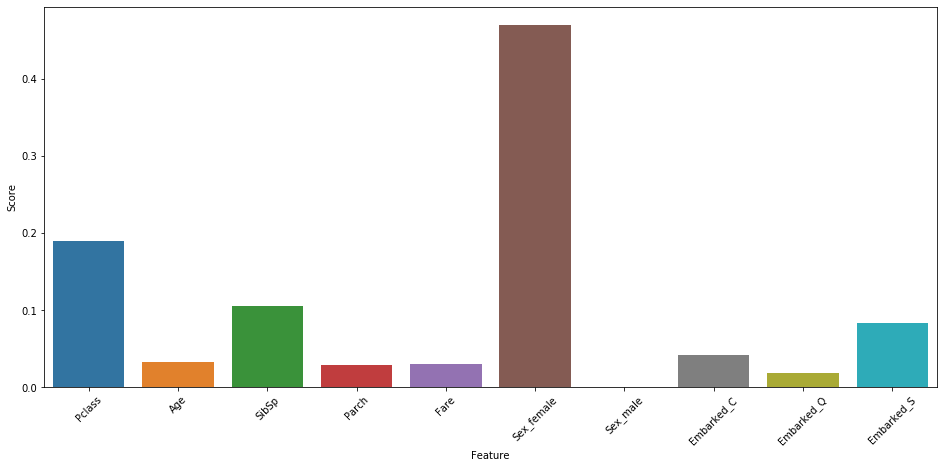

In [308]:
plt.figure(figsize=(16, 7))
sns.barplot(x='Feature', y='Score', data=feature_importance)
plt.xticks(rotation=45)
plt.show()

In [309]:
probs = modelXGB.predict_proba(X_test)
probs = probs[:, 1]

In [310]:
fprXGB, tprXGB, thresholdXGB = roc_curve(y_test, probs, pos_label=1)

In [311]:
print("AUC:", auc(fprXGB, tprXGB))

AUC: 0.874702380952381


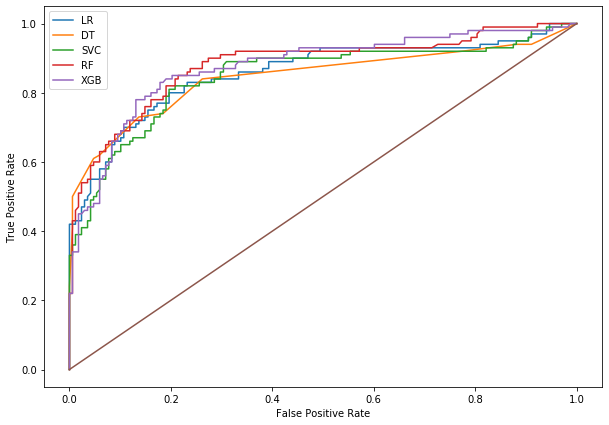

In [312]:
plt.figure(figsize=(10, 7))
plt.plot(fprLR, tprLR)
plt.plot(fprDT, tprDT)
plt.plot(fprSVC, tprSVC)
plt.plot(fprRF, tprRF)
plt.plot(fprXGB, tprXGB)
plt.legend(['LR','DT','SVC','RF','XGB'])
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0, 1], [0, 1])
# show the plot
plt.show()

In [313]:
i = np.arange(len(tprXGB))
roc = pd.DataFrame({'tf': pd.Series(tprXGB-(1-fprXGB), index=i), 'threshold': pd.Series(thresholdXGB, index=i)})
roc_t = roc.iloc[(roc.tf-0).abs().argsort()[:1]]
print('Best thresh:', list(roc_t['threshold']))

Best thresh: [0.2954808473587036]


In [314]:
thresh = 0.2954808473587036
preds = []
for proba in probs:
    if proba >= thresh:
        preds.append(1)
    else:
        preds.append(0)

In [315]:
print(accuracy_score(y_test, preds))
print(f1_score(y_test, preds))
print(confusion_matrix(y_test, preds))

0.8246268656716418
0.7793427230046949
[[138  30]
 [ 17  83]]


#### Let's try a NN

In [319]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [320]:
"""
+++++++++++ 1 +++++++++++
modelNN = keras.Sequential([
        layers.Dense(100, activation=tf.nn.relu, input_shape=[input_size,]),
        layers.Dense(1, activation=tf.nn.sigmoid)
    ])
"""
def createNN(input_size):
    modelNN = keras.Sequential([
        layers.Dense(100, activation=tf.nn.relu, input_shape=[input_size,]),
#         layers.Dropout(0.2),
#         layers.Dense(256, activation=tf.nn.relu),
#         layers.Dropout(0.2),
        layers.Dense(1, activation=tf.nn.sigmoid)
    ])
    modelNN.compile(loss='binary_crossentropy', 
                optimizer='adam', 
                metrics=['accuracy'])
    return modelNN

In [323]:
X.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male',
       'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [342]:
modelNN = createNN(len(X.keys()))

In [343]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10)

In [344]:
modelNN.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_44 (Dense)             (None, 100)               1100      
_________________________________________________________________
dense_45 (Dense)             (None, 1)                 101       
Total params: 1,201
Trainable params: 1,201
Non-trainable params: 0
_________________________________________________________________


In [337]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch
  
    plt.figure(figsize=(10, 7))
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(hist['epoch'], 
           hist['accuracy'], 
           label='Train Acc')
    plt.plot(hist['epoch'], 
           hist['val_accuracy'],
          label='Val Acc')
    plt.legend()

In [345]:
epochs = 100
history = modelNN.fit(
    X_train,
    y_train,
    epochs=epochs,
    validation_split=0.2,
    callbacks=[early_stop]
)

Train on 498 samples, validate on 125 samples
Epoch 1/100
498/498 [==============================] - 0s 788us/sample - loss: 0.7131 - accuracy: 0.5341 - val_loss: 0.7186 - val_accuracy: 0.5440
Epoch 2/100
498/498 [==============================] - 0s 96us/sample - loss: 0.6345 - accuracy: 0.6325 - val_loss: 0.6699 - val_accuracy: 0.5440
Epoch 3/100
498/498 [==============================] - 0s 75us/sample - loss: 0.5874 - accuracy: 0.6727 - val_loss: 0.6151 - val_accuracy: 0.6240
Epoch 4/100
498/498 [==============================] - 0s 109us/sample - loss: 0.5485 - accuracy: 0.7309 - val_loss: 0.5651 - val_accuracy: 0.6800
Epoch 5/100
498/498 [==============================] - 0s 73us/sample - loss: 0.5196 - accuracy: 0.7570 - val_loss: 0.5297 - val_accuracy: 0.7120
Epoch 6/100
498/498 [==============================] - 0s 82us/sample - loss: 0.4945 - accuracy: 0.7871 - val_loss: 0.5035 - val_accuracy: 0.7360
Epoch 7/100
498/498 [==============================] - 0s 81us/sample - loss

In [346]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,accuracy,val_loss,val_accuracy,epoch
28,0.407188,0.833333,0.432181,0.824,28
29,0.406478,0.827309,0.428064,0.824,29
30,0.405122,0.825301,0.432746,0.816,30
31,0.403633,0.837349,0.428909,0.824,31
32,0.403552,0.837349,0.429050,0.824,32


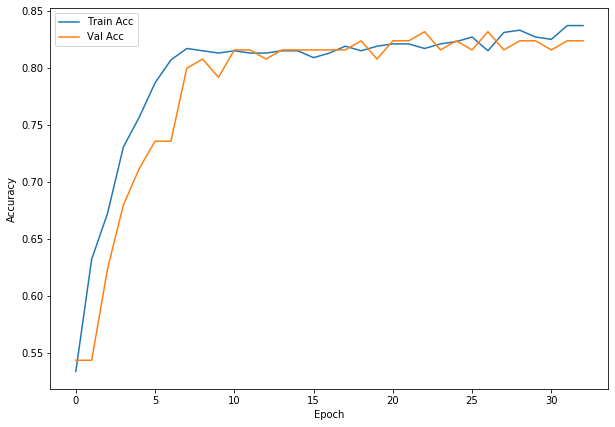

In [347]:
plot_history(history)

In [348]:
loss, acc = modelNN.evaluate(X_test, y_test, verbose=0)
print('Accuracy on test set:', acc)

Accuracy on test set: 0.8134328


#### let's try some CV with all data on the NN

In [340]:
kFold = StratifiedKFold(n_splits=10, random_state=0, shuffle=True)
accs = []
early_stopCV = keras.callbacks.EarlyStopping(monitor='accuracy', patience=10)
for i, (train_idx, test_idx) in enumerate(kFold.split(X, y)):
    print("Fold:", i)
    X_trainCV, X_testCV = X.iloc[train_idx], X.iloc[test_idx]
    y_trainCV, y_testCV = y.iloc[train_idx], y.iloc[test_idx]

    modelNN = createNN(len(X_train.keys()))

    modelNN.fit(
        X_trainCV,
        y_trainCV,
        epochs=100,
        verbose=0,
        callbacks=[early_stopCV]
    )

    _, acc = modelNN.evaluate(X_testCV, y_testCV, verbose=0)
    print('Accuracy:', acc)
    accs.append(acc)        
    print()
print("Mean acc:", np.mean(accs))

Fold: 0
Accuracy: 0.8666667

Fold: 1
Accuracy: 0.8426966

Fold: 2
Accuracy: 0.80898875

Fold: 3
Accuracy: 0.8651685

Fold: 4
Accuracy: 0.85393256

Fold: 5
Accuracy: 0.83146065

Fold: 6
Accuracy: 0.752809

Fold: 7
Accuracy: 0.7977528

Fold: 8
Accuracy: 0.78651685

Fold: 9
Accuracy: 0.7752809

Mean acc: 0.8181273


##### Not bad and promising!
### Let's continue our analysis

In [351]:
probs = modelNN.predict(X_test)

In [354]:
preds = (probs > 0.5)

In [356]:
print(classification_report(y_test, preds))
print(confusion_matrix(y_test, preds))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       168
           1       0.78      0.69      0.73       100

    accuracy                           0.81       268
   macro avg       0.81      0.79      0.80       268
weighted avg       0.81      0.81      0.81       268

[[149  19]
 [ 31  69]]


##### How to get feature importance from a Keras Model?

In [361]:
fprNN, tprNN, thresholdNN = roc_curve(y_test, probs, pos_label=1)

In [362]:
print("AUC:", auc(fprNN, tprNN))

AUC: 0.869702380952381


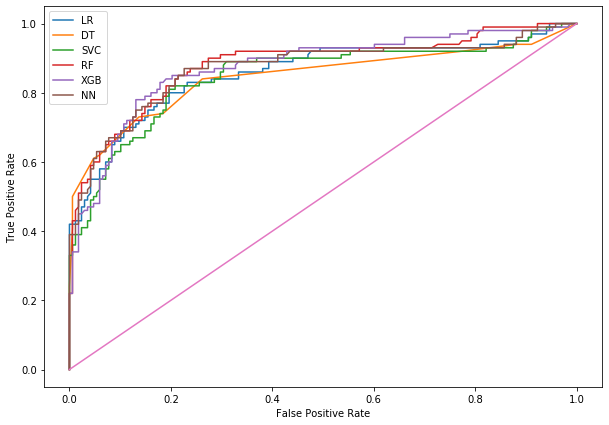

In [363]:
plt.figure(figsize=(10, 7))
plt.plot(fprLR, tprLR)
plt.plot(fprDT, tprDT)
plt.plot(fprSVC, tprSVC)
plt.plot(fprRF, tprRF)
plt.plot(fprXGB, tprXGB)
plt.plot(fprNN, tprNN)
plt.legend(['LR','DT','SVC','RF','XGB','NN'])
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0, 1], [0, 1])
# show the plot
plt.show()

In [364]:
i = np.arange(len(tprNN))
roc = pd.DataFrame({'tf': pd.Series(tprNN-(1-fprNN), index=i), 'threshold': pd.Series(thresholdNN, index=i)})
roc_t = roc.iloc[(roc.tf-0).abs().argsort()[:1]]
print('Best thresh:', list(roc_t['threshold']))

Best thresh: [0.2982158958911896]


In [369]:
preds = (probs >= 0.2982158958911896)

In [370]:
print(accuracy_score(y_test, preds))
print(f1_score(y_test, preds))
print(confusion_matrix(y_test, preds))

0.8059701492537313
0.7547169811320756
[[136  32]
 [ 20  80]]


## Let's play around tuning estimators' params

In [373]:
from sklearn.model_selection import GridSearchCV

### Grid search for SVM

In [371]:
### for SVM
params = {
    'C': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
    'kernel': ['linear', 'rbf'],
    'gamma': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4]
}

In [380]:
gridSVM = GridSearchCV(modelSVC, param_grid=params, scoring='accuracy', cv=10)

In [384]:
gridSVM.fit(X, y)

GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=1.1, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3, gamma=0.1,
                           kernel='rbf', max_iter=-1, probability=True,
                           random_state=0, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'gamma': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [385]:
gridSVM.best_params_

{'C': 1.1, 'gamma': 0.1, 'kernel': 'rbf'}

In [386]:
modelSVC = SVC(random_state=0, kernel='rbf', probability=True, C=1.1, gamma=0.1)
modelSVC.fit(X_train, y_train)
preds = modelSVC.predict(X_test)
print(classification_report(y_test, preds))
print(confusion_matrix(y_test, preds))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       168
           1       0.76      0.70      0.73       100

    accuracy                           0.81       268
   macro avg       0.80      0.78      0.79       268
weighted avg       0.80      0.81      0.80       268

[[146  22]
 [ 30  70]]


In [389]:
probs = modelSVC.predict_proba(X_test)
probs = probs[:, 1]

In [390]:
fprSVM, tprSVM, thresholdSVM = roc_curve(y_test, probs, pos_label=1)

In [391]:
print("AUC:", auc(fprSVM, tprSVM))

AUC: 0.8589285714285714


In [392]:
i = np.arange(len(tprSVM))
roc = pd.DataFrame({'tf': pd.Series(tprSVM-(1-fprSVM), index=i), 'threshold': pd.Series(thresholdSVM, index=i)})
roc_t = roc.iloc[(roc.tf-0).abs().argsort()[:1]]
print('Best thresh:', list(roc_t['threshold']))

Best thresh: [0.19456617888293143]


In [395]:
preds = (probs >= 0.19456617888293143)
print(accuracy_score(y_test, preds))
print(f1_score(y_test, preds))
print(confusion_matrix(y_test, preds))
"""
    what is more important to you? to correctly classify those who will die or those who will survive?
"""

0.7910447761194029
0.7383177570093459
[[133  35]
 [ 21  79]]


### Grid search for LR

In [404]:
### for LR
params = {
    'C': np.logspace(-4, 4, 20),
}

In [405]:
gridLR = GridSearchCV(modelLR, param_grid=params, scoring='accuracy', cv=10)

In [406]:
gridLR.fit(X, y)

GridSearchCV(cv=10, error_score=nan,
             estimator=LogisticRegression(C=0.08858667904100823,
                                          class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=0, solver='liblinear',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([...04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+

In [407]:
gridLR.best_params_

{'C': 0.08858667904100823}

In [410]:
modelLR = LogisticRegression(random_state=0, C=0.08858667904100823)
modelLR.fit(X_train, y_train)
preds = modelLR.predict(X_test)
print(classification_report(y_test, preds))
print(confusion_matrix(y_test, preds))

              precision    recall  f1-score   support

           0       0.84      0.85      0.84       168
           1       0.74      0.72      0.73       100

    accuracy                           0.80       268
   macro avg       0.79      0.79      0.79       268
weighted avg       0.80      0.80      0.80       268

[[143  25]
 [ 28  72]]


In [411]:
probs = modelLR.predict_proba(X_test)
probs = probs[:, 1]

In [412]:
fprLR, tprLR, thresholdLR = roc_curve(y_test, probs, pos_label=1)

In [413]:
print("AUC:", auc(fprLR, tprLR))

AUC: 0.8611904761904762


In [414]:
i = np.arange(len(tprLR))
roc = pd.DataFrame({'tf': pd.Series(tprLR-(1-fprLR), index=i), 'threshold': pd.Series(thresholdLR, index=i)})
roc_t = roc.iloc[(roc.tf-0).abs().argsort()[:1]]
print('Best thresh:', list(roc_t['threshold']))

Best thresh: [0.3578465355584938]


In [416]:
preds = (probs >= 0.3578465355584938)
print(accuracy_score(y_test, preds))
print(f1_score(y_test, preds))
print(confusion_matrix(y_test, preds))

0.7947761194029851
0.7441860465116279
[[133  35]
 [ 20  80]]


### Grid search for RF

In [423]:
### for RF
params = {
    'n_estimators': list(range(150,250,10)),
    #'max_features': list(range(5,10,1)),
    'max_depth': list(range(5, 20, 5))
}

In [424]:
gridRF = GridSearchCV(modelRF, param_grid=params, scoring='accuracy', cv=10)
gridRF.fit(X, y)
print(gridRF.best_params_)

{'max_depth': 10, 'max_features': 6, 'n_estimators': 200}


In [426]:
modelRF = RandomForestClassifier(random_state=0, max_depth=10, n_estimators=200)
modelRF.fit(X_train, y_train)
preds = modelRF.predict(X_test)
print(classification_report(y_test, preds))
print(confusion_matrix(y_test, preds))

              precision    recall  f1-score   support

           0       0.85      0.88      0.87       168
           1       0.79      0.74      0.76       100

    accuracy                           0.83       268
   macro avg       0.82      0.81      0.81       268
weighted avg       0.83      0.83      0.83       268

[[148  20]
 [ 26  74]]


In [427]:
probs = modelRF.predict_proba(X_test)
probs = probs[:, 1]
fprRF, tprRF, thresholdRF = roc_curve(y_test, probs, pos_label=1)
print("AUC:", auc(fprRF, tprRF))
i = np.arange(len(tprRF))
roc = pd.DataFrame({'tf': pd.Series(tprRF-(1-fprRF), index=i), 'threshold': pd.Series(thresholdRF, index=i)})
roc_t = roc.iloc[(roc.tf-0).abs().argsort()[:1]]
print('Best thresh:', list(roc_t['threshold']))

AUC: 0.882827380952381
Best thresh: [0.35645055786394053]


In [428]:
preds = (probs >= 0.35645055786394053)
print(accuracy_score(y_test, preds))
print(f1_score(y_test, preds))
print(confusion_matrix(y_test, preds))

0.8059701492537313
0.7570093457943925
[[135  33]
 [ 19  81]]


In [429]:
"""
    ON YOUR SUBMISSION TO KAGGLE SUBMIT 2 VERSIONS: ONE THRESHOLDED AND ONE AS IT COMES OUT OF THE BOX
"""

'\n    ON YOUR SUBMISSION TO KAGGLE SUBMIT 2 VERSIONS: ONE THRESHOLDED AND ONE AS IT COMES OUT OF THE BOX\n'

### Grid search for XGB

In [431]:
modelXGB.get_params()

{'objective': 'binary:logistic',
 'base_score': 0.5,
 'booster': None,
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'gpu_id': -1,
 'importance_type': 'gain',
 'interaction_constraints': None,
 'learning_rate': 0.300000012,
 'max_delta_step': 0,
 'max_depth': 6,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 200,
 'n_jobs': 0,
 'num_parallel_tree': 1,
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'subsample': 1,
 'tree_method': None,
 'validate_parameters': False,
 'verbosity': None}

In [436]:
# A parameter grid for XGBoost
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0, 0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'n_estimators': [100, 200, 250],
        'max_depth': [4, 6, 10, 15]
        }

In [437]:
gridXGB = GridSearchCV(modelXGB, param_grid=params, scoring='accuracy', cv=10)
gridXGB.fit(X, y)
print(gridXGB.best_params_)

{'colsample_bytree': 1.0, 'gamma': 2, 'max_depth': 6, 'min_child_weight': 5, 'n_estimators': 250, 'subsample': 0.8}


In [438]:
modelXGB = XGBClassifier(
    random_state=0,
    colsample_bytree=1.0,
    max_depth=6, 
    n_estimators=250,
    gamma=2,
    min_child_weight=5,
    subsample=0.8
)
modelXGB.fit(X_train, y_train)
preds = modelXGB.predict(X_test)
print(classification_report(y_test, preds))
print(confusion_matrix(y_test, preds))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88       168
           1       0.85      0.71      0.77       100

    accuracy                           0.84       268
   macro avg       0.84      0.82      0.83       268
weighted avg       0.84      0.84      0.84       268

[[155  13]
 [ 29  71]]


In [439]:
probs = modelXGB.predict_proba(X_test)
probs = probs[:, 1]
fprXGB, tprXGB, thresholdXGB = roc_curve(y_test, probs, pos_label=1)
print("AUC:", auc(fprXGB, tprXGB))
i = np.arange(len(tprXGB))
roc = pd.DataFrame({'tf': pd.Series(tprXGB-(1-fprXGB), index=i), 'threshold': pd.Series(thresholdXGB, index=i)})
roc_t = roc.iloc[(roc.tf-0).abs().argsort()[:1]]
print('Best thresh:', list(roc_t['threshold']))

AUC: 0.8838988095238095
Best thresh: [0.35376712679862976]


In [440]:
preds = (probs >= 0.35376712679862976)
print(accuracy_score(y_test, preds))
print(f1_score(y_test, preds))
print(confusion_matrix(y_test, preds))

0.8432835820895522
0.8000000000000002
[[142  26]
 [ 16  84]]


### Let's improve the NN

In [456]:
"""
+++++++++++ 1 +++++++++++
modelNN = keras.Sequential([
        layers.Dense(100, activation=tf.nn.relu, input_shape=[input_size,]),
        layers.Dense(1, activation=tf.nn.sigmoid)
    ])
+++++++++++ 2 +++++++++++
modelNN = keras.Sequential([
    layers.Dense(100, activation=tf.nn.relu, input_shape=[input_size,]),
    layers.Dropout(0.2),
    layers.Dense(50, activation=tf.nn.relu),
    layers.Dropout(0.2),
    layers.Dense(1, activation=tf.nn.sigmoid)
])
+++++++++++ 3 +++++++++++
modelNN = keras.Sequential([
    layers.Dense(200, activation=tf.nn.relu, input_shape=[input_size,]),
    layers.Dropout(0.2),
    layers.Dense(100, activation=tf.nn.relu),
    layers.Dropout(0.2),
    layers.Dense(50, activation=tf.nn.relu),
    layers.Dropout(0.2),        
    layers.Dense(1, activation=tf.nn.sigmoid)
])

"""
def createNN(input_size):
    modelNN = keras.Sequential([
        layers.Dense(200, activation=tf.nn.relu, input_shape=[input_size,]),
        layers.Dropout(0.2),
        layers.Dense(100, activation=tf.nn.relu),
        layers.Dropout(0.2),
        layers.Dense(50, activation=tf.nn.relu),
        layers.Dropout(0.2),        
        layers.Dense(1, activation=tf.nn.sigmoid)
    ])
    modelNN.compile(loss='binary_crossentropy', 
                optimizer='adam', 
                metrics=['accuracy'])
    return modelNN

In [457]:
kFold = StratifiedKFold(n_splits=10, random_state=0, shuffle=True)
accs = []
early_stopCV = keras.callbacks.EarlyStopping(monitor='accuracy', patience=10)

for i, (train_idx, test_idx) in enumerate(kFold.split(X, y)):
    print("Fold:", i)
    X_trainCV, X_testCV = X.iloc[train_idx], X.iloc[test_idx]
    y_trainCV, y_testCV = y.iloc[train_idx], y.iloc[test_idx]

    modelNN = createNN(len(X_train.keys()))

    modelNN.fit(
        X_trainCV,
        y_trainCV,
        epochs=100,
        verbose=0,
        callbacks=[early_stopCV]
    )

    _, acc = modelNN.evaluate(X_testCV, y_testCV, verbose=0)
    print('Accuracy:', acc)
    accs.append(acc)        
    print()
print("Mean acc:", np.mean(accs))

Fold: 0
Accuracy: 0.8888889

Fold: 1
Accuracy: 0.83146065

Fold: 2
Accuracy: 0.80898875

Fold: 3
Accuracy: 0.8876405

Fold: 4
Accuracy: 0.85393256

Fold: 5
Accuracy: 0.85393256

Fold: 6
Accuracy: 0.76404494

Fold: 7
Accuracy: 0.7977528

Fold: 8
Accuracy: 0.7752809

Fold: 9
Accuracy: 0.76404494

Mean acc: 0.8225967


In [458]:
epochs = 100
history = modelNN.fit(
    X_train,
    y_train,
    epochs=epochs,
    validation_split=0.2,
    callbacks=[early_stop]
)

Train on 498 samples, validate on 125 samples
Epoch 1/100
498/498 [==============================] - 0s 124us/sample - loss: 0.4038 - accuracy: 0.8353 - val_loss: 0.3440 - val_accuracy: 0.8480
Epoch 2/100
498/498 [==============================] - 0s 108us/sample - loss: 0.3892 - accuracy: 0.8554 - val_loss: 0.3801 - val_accuracy: 0.8240
Epoch 3/100
498/498 [==============================] - 0s 163us/sample - loss: 0.3819 - accuracy: 0.8414 - val_loss: 0.3702 - val_accuracy: 0.8320
Epoch 4/100
498/498 [==============================] - 0s 133us/sample - loss: 0.3790 - accuracy: 0.8474 - val_loss: 0.3783 - val_accuracy: 0.8400
Epoch 5/100
498/498 [==============================] - 0s 142us/sample - loss: 0.3676 - accuracy: 0.8494 - val_loss: 0.3963 - val_accuracy: 0.8080
Epoch 6/100
498/498 [==============================] - ETA: 0s - loss: 0.3175 - accuracy: 0.90 - 0s 117us/sample - loss: 0.3707 - accuracy: 0.8514 - val_loss: 0.3772 - val_accuracy: 0.8400
Epoch 7/100
498/498 [=========

In [459]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,accuracy,val_loss,val_accuracy,epoch
6,0.366957,0.857430,0.402755,0.800,6
7,0.344836,0.855422,0.381794,0.848,7
8,0.369044,0.853414,0.393008,0.840,8
9,0.372284,0.853414,0.421693,0.792,9
10,0.345414,0.867470,0.396336,0.816,10


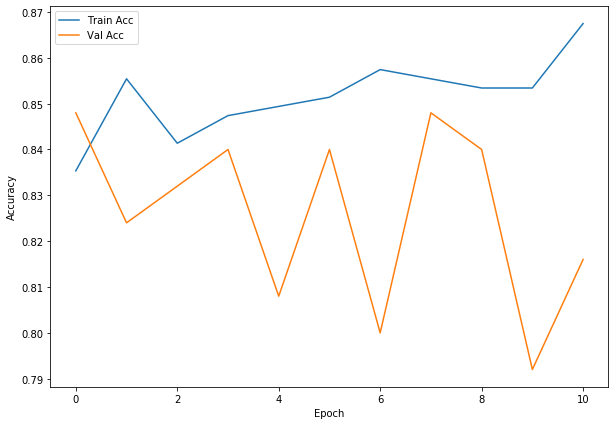

In [460]:
plot_history(history)

In [461]:
loss, acc = modelNN.evaluate(X_test, y_test, verbose=0)
print('Accuracy on test set:', acc)

Accuracy on test set: 0.8395522


In [462]:
probs = modelNN.predict(X_test)
preds = (probs > 0.5)
print(classification_report(y_test, preds))
print(confusion_matrix(y_test, preds))

              precision    recall  f1-score   support

           0       0.83      0.94      0.88       168
           1       0.87      0.67      0.76       100

    accuracy                           0.84       268
   macro avg       0.85      0.81      0.82       268
weighted avg       0.84      0.84      0.83       268

[[158  10]
 [ 33  67]]


In [463]:
fprNN, tprNN, thresholdNN = roc_curve(y_test, probs, pos_label=1)
print("AUC:", auc(fprNN, tprNN))
i = np.arange(len(tprNN))
roc = pd.DataFrame({'tf': pd.Series(tprNN-(1-fprNN), index=i), 'threshold': pd.Series(thresholdNN, index=i)})
roc_t = roc.iloc[(roc.tf-0).abs().argsort()[:1]]
print('Best thresh:', list(roc_t['threshold']))

AUC: 0.8708928571428571
Best thresh: [0.2847461402416229]


In [469]:
preds = (probs >= 0.39237307012081146) ## <=== mid way between best thresh and 0.5, yields good results
print(accuracy_score(y_test, preds))
print(f1_score(y_test, preds))
print(confusion_matrix(y_test, preds))

0.835820895522388
0.7659574468085107
[[152  16]
 [ 28  72]]


In [468]:
((0.5 - 0.2847461402416229) / 2) + 0.2847461402416229

0.39237307012081146

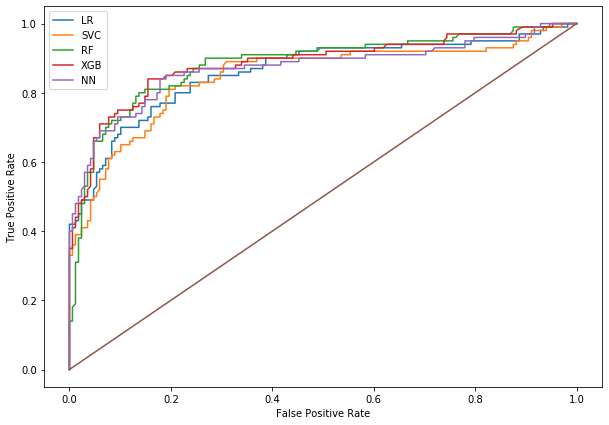

In [472]:
plt.figure(figsize=(10, 7))
plt.plot(fprLR, tprLR)
plt.plot(fprSVC, tprSVC)
plt.plot(fprRF, tprRF)
plt.plot(fprXGB, tprXGB)
plt.plot(fprNN, tprNN)
plt.legend(['LR','SVC','RF','XGB','NN'])
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0, 1], [0, 1])
# show the plot
plt.show()

# Let's work on the test set now

In [473]:
titanic_test = pd.read_csv('datasets/titanic/test.csv')

In [474]:
titanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [475]:
titanic_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [476]:
titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [484]:
missing_val_count_by_column = (titanic_test.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

Cabin    327
dtype: int64


In [478]:
### do almost same transf on test set's misssing vals
titanic_test['Age'] = imputer.transform(titanic_test['Age'].values.reshape(-1, 1))

In [480]:
### Q: CAN WE ASSUME THAT THE DIST OF AGES IN TRAIN SET IS THE SAME AS IN TEST SET? 
### I.E. SAME TRASNFORMATIONS CAN BE APPLIED?
titanic_test[titanic_test['Fare'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [483]:
titanic_test.at[152, 'Fare'] = 14.454200 
### we are imputing w the median, 
### the mean differs too much from this val this is because the dist is skewed
### if we imputed w the mean, maybe a diff prediction would result and thus another acc

In [485]:
### Drop unnecessary cols
passenger_ids = titanic_test['PassengerId']
unnecessary_cols = ['PassengerId', 'Name', 'Ticket', 'Cabin']
titanic_test.drop(unnecessary_cols, inplace=True, axis=1)
titanic_test = pd.get_dummies(titanic_test)

In [486]:
titanic_test.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,34.5,0,0,7.8292,0,1,0,1,0
1,3,47.0,1,0,7.0000,1,0,0,0,1
2,2,62.0,0,0,9.6875,0,1,0,1,0
3,3,27.0,0,0,8.6625,0,1,0,0,1
4,3,22.0,1,1,12.2875,1,0,0,0,1


In [488]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,-0.565736,1,0,-0.878820,0,1,0,0,1
1,1,0.663861,1,0,1.336651,1,0,1,0,0
2,3,-0.258337,0,0,-0.790065,1,0,0,0,1
3,1,0.433312,1,0,1.067352,1,0,0,0,1
4,3,0.433312,0,0,-0.774439,0,1,0,0,1


In [491]:
### scale num vars in test set
titanic_test['Age'] = ageSC.transform(titanic_test['Age'].values.reshape(-1, 1))
titanic_test['Fare'] = ptFare.transform(titanic_test['Fare'].values.reshape(-1, 1))

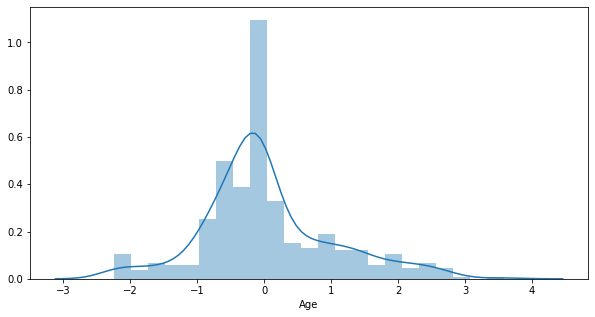

In [492]:
plt.figure(figsize=(10, 5))
sns.distplot(titanic_test['Age'])
plt.show()

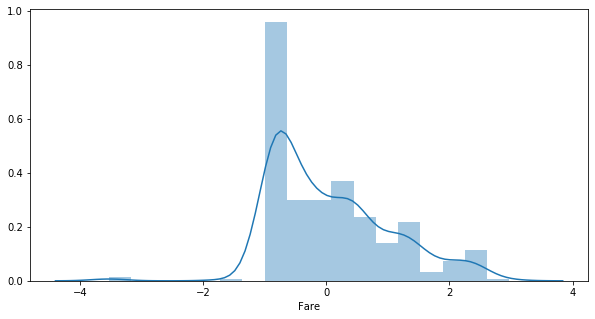

In [493]:
plt.figure(figsize=(10, 5))
sns.distplot(titanic_test['Fare'])
plt.show()

In [495]:
titanic_test.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,0.394887,0,0,-0.802204,0,1,0,1,0
1,3,1.355510,1,0,-0.913735,1,0,0,0,1
2,2,2.508257,0,0,-0.589230,0,1,0,1,0
3,3,-0.181487,0,0,-0.701150,0,1,0,0,1
4,3,-0.565736,1,1,-0.351245,1,0,0,0,1


#### Up to here, the test set is ready for prediction

In [496]:
preds = modelRF.predict(titanic_test)

In [498]:
outputRF = pd.DataFrame({'PassengerId': passenger_ids, 'Survived': preds})

In [499]:
outputRF.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [500]:
outputRF.shape

(418, 2)

In [502]:
outputRF.to_csv('results/titanic_sub_rf.csv', index=False)

In [521]:
preds = modelXGB.predict(titanic_test)
outputXGB = pd.DataFrame({'PassengerId': passenger_ids, 'Survived': preds})
outputXGB.to_csv('results/titanic_sub_xgb.csv', index=False)

In [522]:
probs = modelNN.predict(titanic_test)
preds = []
for proba in probs:
    if proba >= 0.5:
        preds.append(1)
    else:
        preds.append(0)

In [524]:
outputNN = pd.DataFrame({'PassengerId': passenger_ids, 'Survived': preds})
outputNN.to_csv('results/titanic_sub_nn.csv', index=False)

### Submit those 3 files to Kaggle. They were generated without thresholding the model's output